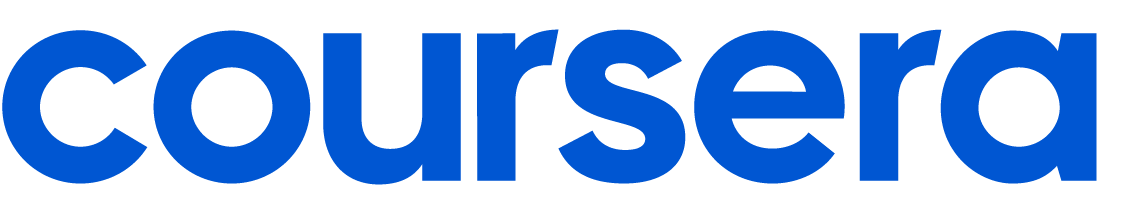

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [442]:
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.svm import SVC
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LassoCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, StratifiedKFold

# Visualization Packages
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# Statistical Testing, Metrics, and Feature Selection packages
import shap
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from statsmodels.stats.descriptivestats import Description
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.feature_selection import chi2, RFE, RFECV, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2, chi2_contingency, pointbiserialr, randint, uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, classification_report

**Set PANDAS Display Options**

In [444]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [446]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None) 
# pd.set_option('display.width', 1000) 
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [447]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [448]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [450]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

### 1. Data Preprocessing

**Descriptive Statistics**

In [453]:
# Duplicates, Null Values, Unique Values, Value Counts, and Data Balance
print('-' * 60)
print(f'Duplicates: {train_df.duplicated().sum()}')
print('-' * 60)
print(f'Null Values:\n{"-" * 60}\n{train_df.isnull().sum()}')
print('-' * 60)
print(f'Unique Values:\n{"-" * 60}\n{train_df.nunique()}')
print('-' * 60)
print(f'Balance of Discrete Data:\n{"-" * 60}')

# Check all discrete data types
dis_col = train_df.select_dtypes(include=['object', 'string', 'category', 'int']).drop(columns='CustomerID').columns.to_list()

# Check balance in all discrete columns
for col in dis_col:
    proportions = train_df[col].value_counts(normalize=True)
    
    # Calculate expected proportion based on the number of unique categories
    expected_proportion = 1 / len(proportions)
    
    # Define the thresholds based on ±40% of the expected proportion
    lower_threshold = expected_proportion * 0.60  # 60% of expected proportion
    upper_threshold = expected_proportion * 1.40  # 140% of expected proportion
    
    unbalanced_categories = proportions[(proportions < lower_threshold) | (proportions > upper_threshold)]
    
    if not unbalanced_categories.empty:
        for category, proportion in unbalanced_categories.items():
            print(f"{col} is unbalanced. Category: {category} at {proportion:.4f}")
    else:
        print(f"{col} is balanced.")

print('-' * 60)

------------------------------------------------------------
Duplicates: 0
------------------------------------------------------------
Null Values:
------------------------------------------------------------
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64
------------------------------------------------------------
Unique Values:
------------------------------------------------------------
AccountAge

In [454]:
# Select all numeric columns (both float and integer)
numeric_columns = train_df.select_dtypes(include='number').drop(columns='Churn').columns.to_list()

# Create a DataFrame to hold box plot statistics
box_plot_stats = pd.DataFrame()

# Calculate box plot statistics for each numeric column
for column in numeric_columns:
    stats = train_df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)][column]
    
    box_plot_stats[column] = {
        'Min': stats['min'],
        'Q1': Q1,
        'Median': stats['50%'],
        'Q3': Q3,
        'Max': stats['max'],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers.count(),
    }

# Transpose the DataFrame for better readability
box_plot_stats = box_plot_stats.T

# Display the box plot statistics DataFrame
print(box_plot_stats)
print('-' * 130)

                               Min          Q1      Median           Q3          Max  Lower Bound  Upper Bound  Outliers Count
AccountAge                1.000000   30.000000   60.000000    90.000000   119.000000   -60.000000   180.000000             0.0
MonthlyCharges            4.990062    8.738543   12.495555    16.238160    19.989957    -2.510882    27.487586             0.0
TotalCharges              4.991154  329.147027  649.878487  1089.317362  2378.723844  -811.108476  2229.572864           741.0
ViewingHoursPerWeek       1.000065   10.763953   20.523116    30.219396    39.999723   -18.419212    59.402561             0.0
AverageViewingDuration    5.000547   48.382395   92.249992   135.908048   179.999275   -82.906085   267.196528             0.0
ContentDownloadsPerMonth  0.000000   12.000000   24.000000    37.000000    49.000000   -25.500000    74.500000             0.0
UserRating                1.000007    2.000853    3.002261     4.002157     4.999989    -1.001103     7.004114 

#### Descriptive Statistics Summary

The `train_df` DataFrame is well-structured, containing no duplicates or null values, ensuring data integrity. 

##### Unique Values
- The dataset features a diverse range of unique values, particularly in `AccountAge` (119 unique values) and `TotalCharges` (243,787 unique values), indicating varied customer profiles. Categorical features like `SubscriptionType` and `PaymentMethod` have limited options.

##### Balance of Discrete Data
- Most discrete features are balanced, except for the target variable `Churn`, which is unbalanced (81.88% no churn vs. 18.12% churn). This imbalance may require special handling in modeling.

##### Box Plot Statistics for Numeric Features
- **AccountAge**: 1 to 119 months, no outliers.
- **MonthlyCharges**: $4.99 to $19.99, no outliers.
- **TotalCharges**: $4.99 to $2378.72, with 741 outliers, indicating significant variability.
- Other features like `ViewingHoursPerWeek`, `AverageViewingDuration`, and `UserRating` show no outliers.

In summary, the dataset is ready for analysis, with attention needed for the unbalanced `Churn` variable and the outliers in `TotalCharges`.

### 2. Feature Engineering

In [457]:
# Create DataFrames for all features in train_df and test_df by dropping the identifier and the target columns
features_train = train_df.drop(columns=['CustomerID', 'Churn'])
features_test = test_df.drop(columns='CustomerID')

In [458]:
# Compute correlation matrix for all numeric features
correlation_matrix = features_train.select_dtypes(include=np.number).corr()

# Select only values greater than 0.5
high_corr = correlation_matrix[correlation_matrix > 0.5]

# Display the result
print(high_corr)

                          AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize
AccountAge                  1.000000             NaN      0.820144                  NaN                     NaN                       NaN         NaN                     NaN            NaN
MonthlyCharges                   NaN             1.0           NaN                  NaN                     NaN                       NaN         NaN                     NaN            NaN
TotalCharges                0.820144             NaN      1.000000                  NaN                     NaN                       NaN         NaN                     NaN            NaN
ViewingHoursPerWeek              NaN             NaN           NaN                  1.0                     NaN                       NaN         NaN                     NaN            NaN
AverageViewingDuration           NaN             NaN   

**Training Set**

In [460]:
# Interaction Features: Combining SubscriptionType and PaymentMethod, Genre Preference and Gender, SubscriptionType and Gender, PaymentMethod and ContentType, and AccountAge and TotalCharges
features_train['SubscriptionPayment'] = features_train['SubscriptionType'].astype(str) + "_" + features_train['PaymentMethod'].astype(str)
features_train['GenreGender'] = features_train['GenrePreference'].astype(str) + "_" + features_train['Gender'].astype(str)
features_train['SubscriptionGender'] = features_train['SubscriptionType'].astype(str) + "_" + features_train['Gender'].astype(str)
features_train['PaymentContent'] = features_train['PaymentMethod'].astype(str) + "_" + features_train['ContentType'].astype(str)
features_train['AgeCharges'] = features_train['AccountAge'] * features_train['TotalCharges'] # Created due to high correlation

# Binning TotalCharges into categories: Low, Medium, High and Very High
q1, q2, q3 = features_train['TotalCharges'].quantile(q=[0.25, 0.5, 0.75])
bins = [0, q1, q2, q3, float('inf')]  # Define bin edges
labels = ['Low', 'Medium', 'High', 'Very High']  # Define bin labels
features_train['TotalChargesBinned'] = pd.cut(features_train['TotalCharges'], bins=bins, labels=labels, right=False)

# Ratio Feature: Ratio of User Rating to Account Age, Total Charges to WatchlistSize, Support Tickets to Rating, Downloads to Charges, Viewing Hours to Duration
features_train['RatingToAccountAgeRatio'] = features_train['UserRating'] / features_train['AccountAge']
features_train['WatchlistToChargesRatio'] = features_train['WatchlistSize'] / features_train['TotalCharges']
features_train['TicketsToRatingsRatio'] = features_train['SupportTicketsPerMonth'] / features_train['UserRating']
features_train['DownloadsToChargesRatio'] = features_train['ContentDownloadsPerMonth'] / features_train['MonthlyCharges'] 
features_train['ViewingHoursToDuration'] = 60 * features_train['ViewingHoursPerWeek'] / features_train['AverageViewingDuration'] # Convert Hours to Minutes to calculate Viewing Sessions per Week

# Absolute Features: Total Support Tickets and Total Downloads over lifetime of account
features_train['TotalSupportTickets'] = features_train['SupportTicketsPerMonth'] * features_train['AccountAge']
features_train['TotalContentDownloads'] = features_train['ContentDownloadsPerMonth'] * features_train['AccountAge']

**Test Set**

In [462]:
# Interaction Features: Combining SubscriptionType and PaymentMethod, Genre Preference and Gender, SubscriptionType and Gender, PaymentMethod and ContentType, and AccountAge and TotalCharges
features_test['SubscriptionPayment'] = features_test['SubscriptionType'].astype(str) + "_" + features_test['PaymentMethod'].astype(str)
features_test['GenreGender'] = features_test['GenrePreference'].astype(str) + "_" + features_test['Gender'].astype(str)
features_test['SubscriptionGender'] = features_test['SubscriptionType'].astype(str) + "_" + features_test['Gender'].astype(str)
features_test['PaymentContent'] = features_test['PaymentMethod'].astype(str) + "_" + features_test['ContentType'].astype(str)
features_test['AgeCharges'] = features_test['AccountAge'] * features_test['TotalCharges'] # Created due to high correlation

# Binning TotalCharges into categories: Low, Medium, High and Very High
q1, q2, q3 = features_test['TotalCharges'].quantile(q=[0.25, 0.5, 0.75])
bins = [0, q1, q2, q3, float('inf')]  # Define bin edges
labels = ['Low', 'Medium', 'High', 'Very High']  # Define bin labels
features_test['TotalChargesBinned'] = pd.cut(features_test['TotalCharges'], bins=bins, labels=labels, right=False)

# Ratio Feature: Ratio of User Rating to Account Age, Total Charges to WatchlistSize, Support Tickets to Rating, Downloads to Charges, Viewing Hours to Duration
features_test['RatingToAccountAgeRatio'] = features_test['UserRating'] / features_test['AccountAge']
features_test['WatchlistToChargesRatio'] = features_test['WatchlistSize'] / features_test['TotalCharges']
features_test['TicketsToRatingsRatio'] = features_test['SupportTicketsPerMonth'] / features_test['UserRating']
features_test['DownloadsToChargesRatio'] = features_test['ContentDownloadsPerMonth'] / features_test['MonthlyCharges'] 
features_test['ViewingHoursToDuration'] = 60 * features_test['ViewingHoursPerWeek'] / features_test['AverageViewingDuration'] # Convert Hours to Minutes to calculate Viewing Sessions per Week

# Absolute Features: Total Support Tickets and Total Downloads over lifetime of account
features_test['TotalSupportTickets'] = features_test['SupportTicketsPerMonth'] * features_test['AccountAge']
features_test['TotalContentDownloads'] = features_test['ContentDownloadsPerMonth'] * features_test['AccountAge']

**Variable Encoding**: Discrete Data
- Ordinal Categories: SubscriptionType, TotalChargesBinned
- Nominal Categories: PaymentMethod, ContentType, DeviceRegistered, GenrePreference, SubscriptionPayment, GenreGender, SubscriptionGender, PaymentContent
- Binary Categories: PaperlessBilling, MultiDeviceAccess, Gender, SubtitlesEnabled, ParentalControl

In [465]:
# Ordinal Encoding for SubscriptionType, TotalChargesBinned
subscriptiontype_order = ['Basic', 'Standard', 'Premium']
features_train['SubscriptionType'] = features_train['SubscriptionType'].apply(lambda x: subscriptiontype_order.index(x)).astype('int')

TotalChargesBinned_order = features_train['TotalChargesBinned'].cat.categories.to_list()
features_train['TotalChargesBinned'] = features_train['TotalChargesBinned'].apply(lambda x: TotalChargesBinned_order.index(x)).astype(int)

# Nominal Encoding for PaymentMethod, ContentType, DeviceRegistered, GenrePreference, SubscriptionPayment, GenreGender, SubscriptionGender, PaymentContent
nom_list = ['PaymentMethod','ContentType','DeviceRegistered','GenrePreference', 'SubscriptionPayment', 'GenreGender', 'SubscriptionGender', 'PaymentContent']
features_train = pd.get_dummies(features_train, columns=nom_list, dtype='int')

# Binary Encoding for PaperlessBilling, MultiDeviceAccess, Gender, SubtitlesEnabled, and ParentalControl
bin_dict = {'Yes':1, 'No':0,'Male':1,'Female':0}
features_train.replace(to_replace=bin_dict, inplace=True)

In [466]:
# Ordinal Encoding for SubscriptionType, TotalChargesBinned
subscriptiontype_order = ['Basic', 'Standard', 'Premium']
features_test['SubscriptionType'] = features_test['SubscriptionType'].apply(lambda x: subscriptiontype_order.index(x)).astype('int')

TotalChargesBinned_order = features_test['TotalChargesBinned'].cat.categories.to_list()
features_test['TotalChargesBinned'] = features_test['TotalChargesBinned'].apply(lambda x: TotalChargesBinned_order.index(x)).astype(int)

# Nominal Encoding for PaymentMethod, ContentType, DeviceRegistered, GenrePreference, SubscriptionPayment, GenreGender, SubscriptionGender, PaymentContent
nom_list = ['PaymentMethod','ContentType','DeviceRegistered','GenrePreference', 'SubscriptionPayment', 'GenreGender', 'SubscriptionGender', 'PaymentContent']
features_test = pd.get_dummies(features_test, columns=nom_list, dtype='int')

# Binary Encoding for PaperlessBilling, MultiDeviceAccess, Gender, SubtitlesEnabled, and ParentalControl
bin_dict = {'Yes':1, 'No':0,'Male':1,'Female':0}
features_test.replace(to_replace=bin_dict, inplace=True)

In [468]:
# Remove any white space from column names and assign back to features columns
features_train.columns = features_train.columns.str.replace(' ', '', regex=False)
features_test.columns = features_test.columns.str.replace(' ', '', regex=False)

# Columns representing continuous data
continuous_columns = numeric_columns + ['RatingToAccountAgeRatio',
                                        'WatchlistToChargesRatio',
                                        'TotalSupportTickets',
                                        'TotalContentDownloads',
                                        'AgeCharges',
                                        'TicketsToRatingsRatio',
                                        'DownloadsToChargesRatio',
                                        'ViewingHoursToDuration']

print("Columns representing continuous data:")
print('-' * 50)
print(continuous_columns)
print(f'Size of Continuous Columns: {len(continuous_columns)}')
print('-' * 200)

# Columns representing discrete data
discrete_columns = [col for col in features_test.columns if col not in continuous_columns]
print("Columns representing discrete data:")
print('-' * 50)
print(discrete_columns)
print(f'Size of Discrete Columns: {len(discrete_columns)}')
print('-' * 200)

# Reducing memory allocation by casting float32 and int16
# Step 1: Round currency columns to 2 decimal places
features_train[['MonthlyCharges', 'TotalCharges']] = features_train[['MonthlyCharges', 'TotalCharges']].round(2)
features_test[['MonthlyCharges', 'TotalCharges']] = features_test[['MonthlyCharges', 'TotalCharges']].round(2)

# Step 2: Convert all continuous columns to float32
features_train[continuous_columns] = features_train[continuous_columns].astype('float32')
features_test[continuous_columns] = features_test[continuous_columns].astype('float32')

# Step 3: Convert all discrete columns to int16
features_train[discrete_columns] = features_train[discrete_columns].astype('int16')
features_test[discrete_columns] = features_test[discrete_columns].astype('int16')

Columns representing continuous data:
--------------------------------------------------
['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize', 'RatingToAccountAgeRatio', 'WatchlistToChargesRatio', 'TotalSupportTickets', 'TotalContentDownloads', 'AgeCharges', 'TicketsToRatingsRatio', 'DownloadsToChargesRatio', 'ViewingHoursToDuration']
Size of Continuous Columns: 17
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Columns representing discrete data:
--------------------------------------------------
['SubscriptionType', 'PaperlessBilling', 'MultiDeviceAccess', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'TotalChargesBinned', 'PaymentMethod_Banktransfer', 'PaymentMethod_Creditcard', 'PaymentMethod_Electroni

In [469]:
# Display info on all features being considered for modeling
print(features_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 80 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   AccountAge                                    243787 non-null  float32
 1   MonthlyCharges                                243787 non-null  float32
 2   TotalCharges                                  243787 non-null  float32
 3   SubscriptionType                              243787 non-null  int16  
 4   PaperlessBilling                              243787 non-null  int16  
 5   MultiDeviceAccess                             243787 non-null  int16  
 6   ViewingHoursPerWeek                           243787 non-null  float32
 7   AverageViewingDuration                        243787 non-null  float32
 8   ContentDownloadsPerMonth                      243787 non-null  float32
 9   UserRating                                    24

### 3. Feature Scaling

**Continuous Features**

In [472]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the continuous features of the new training data and transform them
features_train[continuous_columns] = scaler.fit_transform(features_train[continuous_columns])

# Transform the continuous features of the original test set using the same scaler
features_test[continuous_columns] = scaler.transform(features_test[continuous_columns])

### 4. Data Splitting

In [474]:
# Assigning predictor and target variables for training set
X = features_train
y = train_df['Churn']

# Split training data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shape of features and target
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (195029, 80)
Shape of y_train: (195029,)
Shape of X_test: (48758, 80)
Shape of y_test: (48758,)


**Random Sample**

In [476]:
# Randomly sample training set and test set for future modeling
X_train_sample = X_train.sample(n=20000, random_state=42)
y_train_sample = y_train[X_train_sample.index]

# Print training and test sets
print(f'Shape of X_train_sample: {X_train_sample.shape}')
print(f'Shape of y_train_sample: {y_train_sample.shape}')

Shape of X_train_sample: (20000, 80)
Shape of y_train_sample: (20000,)


In [477]:
# Calculate class ratio before sample
num_positive_before = (y_train == 1).sum()
num_negative_before = (y_train == 0).sum()
ratio_before = num_negative_before / num_positive_before

# Calculate class ratio after sample
num_positive_after = (y_train_sample == 1).sum()
num_negative_after = (y_train_sample == 0).sum()
ratio_after = num_negative_after / num_positive_after

print(f'Class Ratio before sample: {ratio_before:.4f}')
print(f'Class Ratio after sample: {ratio_after:.4f}')

Class Ratio before sample: 4.5179
Class Ratio after sample: 4.5944


### 4. Feature Selection

**Establish Baseline Model**

In [480]:
# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [481]:
# Initialize and train baseline Logistic Regression model on the sample data
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_sample, y_train_sample)

# Calculate cross-validated metrics for sample training data
lr_scores_train = cross_validate(lr, X_train_sample, y_train_sample, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=stratified_kfold)

# Create DataFrame of mean training set scores
lr_scores_train_df = pd.DataFrame(lr_scores_train)
lr_scores_train_df.drop(columns=['fit_time', 'score_time'], inplace=True)
lr_scores_train_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
print('Cross Validation mean of sample training set (Before):')
print('-' * 60)
print(lr_scores_train_df.mean(axis=0))
print('-' * 100)

# Calculate cross-validated metrics for test data
lr_scores_test = cross_validate(lr, X_test, y_test, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=stratified_kfold)

# Create DataFrame of mean test set scores
lr_scores_test_df = pd.DataFrame(lr_scores_test)
lr_scores_test_df.drop(columns=['fit_time', 'score_time'], inplace=True)
lr_scores_test_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
print('Cross Validation mean of test set (Before):')
print('-' * 60)
print(lr_scores_test_df.mean(axis=0))
print('-' * 100)

Cross Validation mean of sample training set (Before):
------------------------------------------------------------
Accuracy     0.677550
Precision    0.316102
Recall       0.691189
F1           0.433793
ROC_AUC      0.745708
dtype: float64
----------------------------------------------------------------------------------------------------
Cross Validation mean of test set (Before):
------------------------------------------------------------
Accuracy     0.680319
Precision    0.322911
Recall       0.696503
F1           0.441248
ROC_AUC      0.753393
dtype: float64
----------------------------------------------------------------------------------------------------


**Recursive Feature Elimination with Cross Validation**

In [483]:
# Declare initial features list
initial_features = X_train_sample.columns.to_list()

# Define the RFECV model
rfecv = RFECV(estimator=lr, step=1, min_features_to_select=22, cv=stratified_kfold, scoring='roc_auc', n_jobs=-1)

# Fit the RFECV model to the training set sample
rfecv.fit(X_train_sample, y_train_sample)

# Print the number of features selected
print("Number of features selected:", rfecv.n_features_)
print('-' * 200)

# Print the names of the selected features
selected_features = X_train_sample.columns[rfecv.support_]
print("Selected features:", selected_features)
print('-' * 200)

# Create a DataFrame for feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': initial_features,
    'Ranking': rfecv.ranking_
})

# Sort the DataFrame by ranking (ascending order)
feature_ranking_df_sorted = feature_ranking_df.sort_values(by='Ranking')

# Print the sorted feature rankings
print("Feature rankings of selected features sorted by importance (most to least important):")
print(feature_ranking_df_sorted.head(rfecv.n_features_))
print('-' * 200)

# Create list of remaining features
remaining_features = [f for f, support in zip(initial_features, rfecv.support_) if support]

# Refit Logistic Regression model with selected features
lr.fit(X_train_sample[remaining_features], y_train_sample)

# Calculate cross-validated metrics for the sample training set with the remaining features
lr_scores_train = cross_validate(lr, X_train_sample[remaining_features], y_train_sample, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=stratified_kfold)

# Create DataFrame of mean training set scores for Logistic Regression with RFECV
lr_scores_train_df = pd.DataFrame(lr_scores_train)
lr_scores_train_df.drop(columns=['fit_time', 'score_time'], inplace=True)
lr_scores_train_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
print('Cross Validation mean of training set (After):')
print('-' * 60)
print(lr_scores_train_df.mean(axis=0))
print('-' * 100)

# Calculate cross-validated metrics for the test set with the remaining features
lr_scores_test = cross_validate(lr, X_test[remaining_features], y_test, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=stratified_kfold)

# Create DataFrame of test set scores for Logistic Regression with RFECV
lr_scores_test_df = pd.DataFrame(lr_scores_test)
lr_scores_test_df.drop(columns=['fit_time', 'score_time'], inplace=True)
lr_scores_test_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
print('Cross Validation mean of test set (After):')
print('-' * 60)
print(lr_scores_test_df.mean(axis=0))
print('-' * 100)

Number of features selected: 22
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Selected features: Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'AgeCharges', 'PaymentMethod_Creditcard', 'ContentType_Both', 'ContentType_Movies', 'ContentType_TVShows', 'GenrePreference_Action', 'SubscriptionPayment_Basic_Electroniccheck', 'SubscriptionPayment_Premium_Banktransfer', 'SubscriptionPayment_Premium_Creditcard', 'SubscriptionPayment_Premium_Electroniccheck', 'SubscriptionPayment_Premium_Mailedcheck', 'GenreGender_Fantasy_Female', 'GenreGender_Sci-Fi_Female', 'PaymentContent_Mailedcheck_Both'], dtype='object')
---------------------------------------------------------------------------------------------------------------

**Baseline Model Performance After Feature Selection**

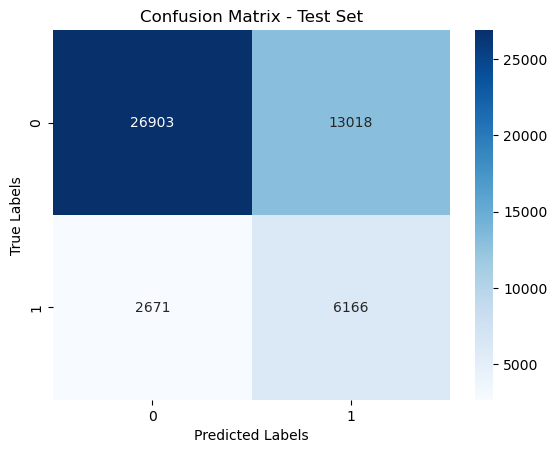

Classification Report - Testing Set
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     39921
           1       0.32      0.70      0.44      8837

    accuracy                           0.68     48758
   macro avg       0.62      0.69      0.61     48758
weighted avg       0.80      0.68      0.71     48758



In [485]:
# Get predictions for baseline model Logistic Regression
y_pred_baseline = lr.predict(X_test[remaining_features])

# Confusion matrix for the test set
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

# Plot confusion matrices for training and test sets
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report for testing set
class_report_baseline = classification_report(y_test, y_pred_baseline)
print("Classification Report - Testing Set")
print(class_report_baseline)

### 5. Model Selection & Testing

**Update Data with Selected Features**

In [494]:
# Apply remaining features from Recursive Feature Elimination to training and test sets
X_train_selected = X_train[remaining_features]
X_test_selected = X_test[remaining_features]

**Random Sample**

In [497]:
# Create new random samples for training and test sets with selected features
X_train_selected_sample = X_train_selected.sample(n=20000, random_state=4)
y_train_selected_sample = y_train[X_train_selected_sample.index]

**Parallel Model Testing with Randomized Search CV**

In [111]:
# Dictionary with classification models to predict Churn: parameters chosen based on insights from previous section
models = {
    'SGDClassifier': {
        'model': SGDClassifier(random_state=42),
        'params': {
            'loss': ['hinge', 'modified_huber', 'log_loss'],  
            'penalty': ['elasticnet'], 
            'l1_ratio': np.arange(0, 1.01, 0.1).tolist(),
            'alpha': np.logspace(-5, -3, 12).tolist(),  # Smaller alpha for more regularization
            'max_iter': np.arange(1000, 3001, 250).tolist(),  # Reasonable max iterations
            'learning_rate': ['optimal', 'invscaling', 'adaptive'],
            'eta0': np.logspace(-6, 0, 12).tolist(),  # Increased range of learning rates
            'tol': np.logspace(-5, -1, 12).tolist(),
            'warm_start': [True, False],  # Allow the model to reuse the solution of the previous fit as initialization
            'class_weight': [None, 'balanced', {0:1, 1:2.5}, {0:1, 1:ratio_after}, {0:2.5, 1:1}, {0:ratio_after, 1:1}]  # Adjust weights for minority class
        }
    },
    'HistGradientBoosting': {
        'model': HistGradientBoostingClassifier(random_state=42),
        'params': {
            'max_iter': np.arange(100, 501, 100).tolist(),  # Number of boosting iterations
            'max_depth': np.arange(1, 12, 2).tolist(),  # Maximum depth of the trees
            'learning_rate': np.logspace(-3, 0, 12).tolist(),  # Learning rate
            'min_samples_leaf': np.arange(1, 20, 3).tolist(),  # Minimum samples per leaf
            'l2_regularization': np.logspace(-2, 2, 12).tolist(),  # L2 regularization
            'class_weight': [None, 'balanced', {0:1, 1:2.5}, {0:1, 1:ratio_after}, {0:2.5, 1:1}, {0:ratio_after, 1:1}]  # Handle class imbalance
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42),
        'params': {
            'n_estimators': np.arange(100, 401, 100).tolist(),  # Reduced number of boosting rounds
            'max_depth': np.arange(1, 12, 2).tolist(),  # Keep trees shallow to avoid overfitting
            'learning_rate': np.logspace(-3, 0, 12).tolist(),  # Smaller learning rate for gradual learning
            'subsample': np.arange(0.6, 1.01, 0.05).tolist(),  # Ensure enough samples per tree
            'colsample_bytree': np.arange(0.6, 1.01, 0.05).tolist(),  # Subsample columns for diversity
            'gamma': np.logspace(0, 1, 12).tolist(),
            'reg_lambda': np.logspace(-2, 2, 12).tolist(),  # Change to evenly spaced logarithmic values
            'reg_alpha': np.logspace(-4, 1, 12).tolist(),  # Change to evenly spaced logarithmic values
            'min_child_weight': np.arange(1, 12, 2).tolist(),  # Minimum sum of instance weight (hessian) needed in a child
            'scale_pos_weight': [0.25, 0.5, 1, 2.5, ratio_after]  # Set based on class imbalance
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, verbose=0),  # Suppress output
        'params': {
            'iterations': np.arange(100, 501, 100).tolist(),  # Number of boosting iterations
            'depth': np.arange(1, 12, 2).tolist(),  # Depth of the trees
            'learning_rate': np.logspace(-3, 0, 12).tolist(),  # Learning rate
            'l2_leaf_reg': np.logspace(-2, 2, 12).tolist(),  # L2 regularization
            'class_weights': [[1.0, 1.0], [2.0, 1.0], [1.0, 2.0], [1.0, 3.0], [3.0, 1.0], [1.0, ratio_after], [ratio_after, 1.0]],  # Handle class imbalance
            'border_count': [32, 50, 100]  # Number of splits for categorical features
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'penalty': ['elasticnet'],  # Include elasticnet
            'C': np.logspace(-3, 3, 12).tolist(),  # Fine-tune regularization
            'solver': ['saga'], 
            'max_iter': np.arange(100, 801, 100).tolist(),  # Fewer iterations since it's simple
            'tol': np.logspace(-5, -1, 12).tolist(),
            'l1_ratio': np.arange(0, 1.01, 0.1).tolist(),
            'class_weight': [None, 'balanced', {0:1, 1:2.5}, {0:1, 1:ratio_after}, {0:2.5, 1:1}, {0:ratio_after, 1:1}]  # Class weight for imbalance
        }
    }
}

In [115]:
# Initialize lists to store evaluation metrics
train_results = []
test_results = []

# Dictionary to store best estimators
best_estimators = {}

# Loop through each model and perform RandomizedSearchCV
for model_name, model_info in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")

    # Make a copy of the parameter grid to avoid altering the original
    param_distributions = model_info['params'].copy()

    if model_name == 'SGDClassifier':
        
        # Ensure l1_ratio is only used for elasticnet
        if 'elasticnet' in param_distributions.get('penalty', []):
            param_distributions['l1_ratio'] = np.arange(0, 1.01, 0.05)
        else:
            param_distributions['l1_ratio'] = [None]  # No l1_ratio for other penalties

        # Ensure eta0 is None for 'optimal' learning rate
        if 'invscaling' in param_distributions.get('learning_rate', []) or 'adaptive' in param_distributions.get('learning_rate', []):
            param_distributions['eta0'] = np.logspace(-6, 0, 12)  # Include eta0 for invscaling/adaptive
        else:
            param_distributions['eta0'] = [None]  # No eta0 for 'optimal'

    elif model_name == 'LogisticRegression':

        # If elasticnet is chosen, ensure saga is the solver
        if 'elasticnet' in param_distributions.get('penalty', []):
            param_distributions['solver'] = ['saga']  # Only saga supports elasticnet

        # If newton-cholesky is chosen, only allow l2 penalty
        if 'newton-cholesky' in param_distributions.get('solver', []):
            param_distributions['penalty'] = ['l2']  # Only l2 penalty for newton-cholesky
            del param_distributions['l1_ratio']  # Remove l1_ratio for l2 penalty

        # Ensure liblinear does not use elasticnet
        if 'liblinear' in param_distributions.get('solver', []):
            param_distributions['penalty'] = ['l2']  # liblinear supports l1 and l2
            del param_distributions['l1_ratio']  # Remove l1_ratio for liblinear


    # Other models' params remain unchanged
    else:
        param_distributions = model_info['params']
    
    # Initialize RandomizedSearchCV with stratified_kfold cv strategy
    randomized_search = RandomizedSearchCV(
        estimator=model_info['model'],
        param_distributions=param_distributions,
        n_iter=60 if model_name in ['CatBoost', 'XGBoost', 'HistGradientBoosting'] else 240,  # Adjust iterations per model
        scoring='roc_auc',
        cv=stratified_kfold,  
        random_state=42,
        n_jobs=-1,
        verbose=2 
    )
    
    # Fit the model on the subsample
    randomized_search.fit(X_train_selected_sample, y_train_selected_sample)
    
    # Get the best estimator
    best_model = randomized_search.best_estimator_
    best_estimators[model_name] = best_model

    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")
    print(f"Best ROC_AUC score for {model_name}: {randomized_search.best_score_}")
    print("-" * 200)

# Loop through best estimators
for model_name, best_model in best_estimators.items():
    print(f"Evaluating {model_name}")
    
    # Refit the model with the full training data
    best_model.fit(X_train_selected, y_train)

    # Predict probabilities on the full training set
    y_train_pred_proba = best_model.predict_proba(X_train_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None

    # Calculate the optimal threshold based on ROC AUC
    if y_train_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
        gmeans = np.sqrt(tpr * (1 - fpr))
        optimal_idx = gmeans.argmax()  # Maximize G-mean
        optimal_threshold = thresholds[optimal_idx]
        print(f"Optimal threshold for {model_name} based on ROC AUC: {optimal_threshold}")
    else:
        optimal_threshold = 0.5  # Default threshold if probabilities are not available
    
    # Apply the optimal threshold for predictions
    y_train_pred = (y_train_pred_proba >= optimal_threshold).astype(int) if y_train_pred_proba is not None else best_model.predict(X_train_selected)
    y_test_pred_proba = best_model.predict_proba(X_test_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None
    y_test_pred = (y_test_pred_proba >= optimal_threshold).astype(int) if y_test_pred_proba is not None else best_model.predict(X_test_selected)

    # Calculate evaluation metrics (accuracy, precision, recall, F1 score, ROC AUC) for the training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba) if y_train_pred_proba is not None else "N/A"

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, zero_division=1)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else "N/A"

    # Append results
    train_results.append({
        'Model': model_name,
        'Accuracy': train_accuracy,
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1,
        'ROC_AUC': train_roc_auc
    })
    
    test_results.append({
        'Model': model_name,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1,
        'ROC_AUC': test_roc_auc
    })

# Display training results
train_results_df = pd.DataFrame(train_results)
print('-' * 200)
print("Training Results on full set:")
print(train_results_df)
print("-" * 200)

# Display test results
test_results_df = pd.DataFrame(test_results)
print("Test Results:")
print(test_results_df)

Running RandomizedSearchCV for SGDClassifier
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters for SGDClassifier: {'warm_start': False, 'tol': 0.0006579332246575682, 'penalty': 'elasticnet', 'max_iter': 2750, 'loss': 'log_loss', 'learning_rate': 'invscaling', 'l1_ratio': 0.35000000000000003, 'eta0': 0.2848035868435799, 'class_weight': {0: 4.594405594405594, 1: 1}, 'alpha': 8.111308307896872e-05}
Best ROC_AUC score for SGDClassifier: 0.7463370602436864
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Running RandomizedSearchCV for HistGradientBoosting
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters for HistGradientBoosting: {'min_samples_leaf': 10, 'max_iter': 400, 'max_depth': 1, 'learning_rate': 0.08111308307896868, 'l2_regularization': 18.73817422860385, 'class_weight': {0: 1

### 6. Hyperparameter Tuning with Grid Search CV

In [152]:
models_grid = {
    'SGDClassifier': {
        'model': SGDClassifier(random_state=42),
        'params': {
            'alpha': np.linspace(6.75e-5, 1e-3, 6).tolist(),  # Narrowed around best alpha
            'eta0': np.linspace(0.185, 0.65, 6).tolist(),  # Around the best eta0
            'penalty': ['elasticnet'],
            'l1_ratio': [0.35],  # Refined around best value
            'learning_rate': ['invscaling'],  # Best found in RandomizedSearchCV
            'loss': ['log_loss'],  # Keep best performing loss
            'max_iter': [2750],  # Narrow range of iterations
            'tol': np.linspace(4.75e-4, 1.1e-3, 6).tolist(),  # Narrow tol values
            'warm_start': [False]  # Keep based on the best found value
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, silent=True),
        'params': {
            'learning_rate': np.linspace(3.35e-2, 6.25e-2, 4).tolist(),  # Around the best learning rate
            'l2_leaf_reg': np.linspace(1.85, 6.5, 4).tolist(),  # Focus on values around the best l2 reg
            'iterations': [300],  # Slightly more or fewer iterations
            'depth': [3, 4],  # Test a slightly deeper model as well
            'class_weights': [[4.59, 1.0]],  # Around best weights
            'border_count': [100, 150, 200, 400]  # Small variation around the best value
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': np.linspace(3.35e-2, 6.25e-2, 4).tolist(),  # Focus around the best regularization strength
            'tol': np.linspace(3.35e-2, 6.25e-2, 4).tolist(),  # Around the best tolerance
            'l1_ratio': np.linspace(0, 0.045, 4).tolist(),  # Fine-tuned around the best l1_ratio
            'penalty': ['elasticnet'],  # Keep elasticnet but allow l2
            'max_iter': [200, 300],  # Slightly more or fewer iterations
            'solver': ['saga'],
            'class_weight': ['balanced', {0:ratio_after, 1:1}]  # Test class weights
        }
    }
}

In [154]:
# Initialize lists to store evaluation metrics
train_results = []
test_results = []

# Dictionary to store best estimators
best_estimators_grid = {}

# Loop through each model and perform GridSearchCV
for model_name, model_info in models_grid.items():
    print(f"Running GridSearchCV for {model_name}")
    
    # Initialize GridSearchCV with stratified k-fold cross-validation
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=stratified_kfold,
        scoring='roc_auc',
        verbose=2,
        refit=True,
        n_jobs=-1
    )
    
   # Fit the model on the subsample
    grid_search.fit(X_train_selected_sample, y_train_selected_sample)
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_estimators_grid[model_name] = best_model

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best ROC_AUC score for {model_name}: {grid_search.best_score_}")
    print("-" * 200)

# Loop through each model for evaluation
for model_name, best_model in best_estimators_grid.items():
    print(f"Evaluating {model_name}")

    # Refit the model with the full training data
    best_model.fit(X_train_selected, y_train)

    # Predict probabilities on the training set
    y_train_pred_proba = best_model.predict_proba(X_train_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None

    # Calculate the optimal threshold based on ROC AUC
    if y_train_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
        gmeans = np.sqrt(tpr * (1 - fpr))
        optimal_idx = gmeans.argmax()  # Maximize G-mean
        optimal_threshold = thresholds[optimal_idx]
        print(f"Optimal threshold for {model_name} based on ROC AUC: {optimal_threshold}")
    else:
        optimal_threshold = 0.5  # Default threshold if probabilities are not available
    
    # Apply the optimal threshold for predictions
    y_train_pred = (y_train_pred_proba >= optimal_threshold).astype(int) if y_train_pred_proba is not None else best_model.predict(X_train_selected)
    y_test_pred_proba = best_model.predict_proba(X_test_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None
    y_test_pred = (y_test_pred_proba >= optimal_threshold).astype(int) if y_test_pred_proba is not None else best_model.predict(X_test_selected)

    # Calculate evaluation metrics for both train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba) if y_train_pred_proba is not None else "N/A"
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, zero_division=1)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else "N/A"

     # Append results
    train_results.append({
        'Model': model_name,
        'Accuracy': train_accuracy,
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1,
        'ROC_AUC': train_roc_auc
    })
    
    test_results.append({
        'Model': model_name,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1,
        'ROC_AUC': test_roc_auc
    })

# Display training results
train_results_df = pd.DataFrame(train_results)
print('-' * 200)
print("Training Results on full set:")
print(train_results_df)
print("-" * 200)

# Display test results
test_results_df = pd.DataFrame(test_results)
print("Test Results:")
print(test_results_df)

Running GridSearchCV for SGDClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for SGDClassifier: {'alpha': 6.75e-05, 'eta0': 0.278, 'l1_ratio': 0.35, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 2750, 'penalty': 'elasticnet', 'tol': 0.000475, 'warm_start': False}
Best ROC_AUC score for SGDClassifier: 0.7463632300332813
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Running GridSearchCV for CatBoost
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters for CatBoost: {'border_count': 200, 'class_weights': [4.59, 1.0], 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 4.95, 'learning_rate': 0.0335}
Best ROC_AUC score for CatBoost: 0.7434740021833081
---------------------------------------------------------------------------------------------------------------

### 7. Stacked Model Ensemble Learning

**Base Learner Diversity** - Neural Network

In [156]:
# Define the model
mlp = MLPClassifier(random_state=42)

param_distributions = {
    'hidden_layer_sizes': [
        (50,), (100,), (150,), (200,),  # Single hidden layers
        (50, 50), (100, 50), (100, 100), (150, 100),  # Two hidden layers
        (50, 50, 50), (100, 50, 50), (100, 100, 50), (100, 100, 100)  # Three hidden layers
    ],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],  # Added 'identity'
    'solver': ['adam', 'sgd', 'lbfgs'],  # Added 'lbfgs'
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Expanded alpha values
    'learning_rate': ['constant', 'adaptive', 'invscaling'],  # Added 'invscaling'
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Initial learning rate for 'sgd' and 'adam'
    'max_iter': [400, 600, 800, 1000, 1200],  # Number of iterations for training
    'momentum': [0.2, 0.4, 0.6, 0.8, 0.9, 1.0],  # Momentum for 'sgd'
    'nesterovs_momentum': [True, False],  # Nesterov's momentum for 'sgd'
    'early_stopping': [True, False],  # Early stopping option
    'validation_fraction': [0.1, 0.2, 0.3],  # Fraction of training data to set aside for validation
    'n_iter_no_change': [5, 10, 15, 20, 25]  # Number of iterations with no improvement to wait before stopping
}

# Set up GridSearchCV
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_distributions, scoring='roc_auc', cv=stratified_kfold, n_jobs=-1, verbose=2, n_iter=60)

# Fit the model using the sampled training data
random_search.fit(X_train_selected_sample, y_train_selected_sample)

# Get the best model from grid search
best_model = random_search.best_estimator_

print(f"Best parameters for MLPClassifier: {random_search.best_params_}")
print(f"Best ROC_AUC score for MLPClassifier: {random_search.best_score_}")
print("-" * 200)

# Refit the best model using the full training data
best_model.fit(X_train_selected, y_train)

# Predict probabilities on the training set
y_train_pred_proba = best_model.predict_proba(X_train_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Calculate the optimal threshold based on ROC AUC
if y_train_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
    gmeans = np.sqrt(tpr * (1 - fpr))
    optimal_idx = gmeans.argmax()  # Maximize G-mean
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal threshold for MLPClassifier based on ROC AUC: {optimal_threshold}")
else:
    optimal_threshold = 0.5  # Default threshold if probabilities are not available
    
# Apply the optimal threshold for predictions
y_train_pred = (y_train_pred_proba >= optimal_threshold).astype(int) if y_train_pred_proba is not None else best_model.predict(X_train_selected)
y_test_pred_proba = best_model.predict_proba(X_test_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None
y_test_pred = (y_test_pred_proba >= optimal_threshold).astype(int) if y_test_pred_proba is not None else best_model.predict(X_test_selected)

# Calculate evaluation metrics for both train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, zero_division=1)
train_recall = recall_score(y_train, y_train_pred, zero_division=1)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba) if y_train_pred_proba is not None else "N/A"
    
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, zero_division=1)
test_recall = recall_score(y_test, y_test_pred, zero_division=1)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else "N/A"

# Append results
train_results = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_recall,
    'F1 Score': train_f1,
    'ROC_AUC': train_roc_auc
}
    
test_results = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1 Score': test_f1,
    'ROC_AUC': test_roc_auc
}

# Display training results
train_results_df = pd.DataFrame([train_results])
print('-' * 200)
print("Training Results on full set:")
print(train_results_df)
print("-" * 200)

# Display test results
test_results_df = pd.DataFrame([test_results])
print("Test Results:")
print(test_results_df)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters for MLPClassifier: {'validation_fraction': 0.2, 'solver': 'adam', 'nesterovs_momentum': True, 'n_iter_no_change': 20, 'momentum': 1.0, 'max_iter': 1200, 'learning_rate_init': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'early_stopping': False, 'alpha': 1.0, 'activation': 'identity'}
Best ROC_AUC score for MLPClassifier: 0.7460644374990654
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Optimal threshold for MLPClassifier based on ROC AUC: 0.18687374889850616
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Training Results on full set:
   Accuracy  Precision    Recall  F1 Score   ROC_AUC

**Tune MLP Classifier and HistGradientBoosting Classifier**

In [178]:
# Tuning the MLP Classifier and HistGradientBoosting Classifier for addition to the Stacking Classifier
models_diverse = {
    'MLPClassifier': {
        'model': MLPClassifier(random_state=42),
        'params': {
            'hidden_layer_sizes': [(100,)], # Added 3 hidden layers
            'activation': ['identity'],  # Set from random search
            'solver': ['adam', 'sgd'],  # Set from random search
            'alpha': np.linspace(0.55, 1.0, 5).tolist(),  # Narrowed range arround 0.01
            'learning_rate': ['constant'],  # Set from random search
            'max_iter': [1200],  # Number of iterations for training
            'nesterovs_momentum': [True], # Set from random search
            'momentum': [1.0],
            'early_stopping': [True],
            'validation_fraction': [0.2],
            'n_iter_no_change': [20],
            'learning_rate_init': np.linspace(1e-5, 1e-4, 5).tolist()  
        }
    },
    'HistGradientBoosting': {
        'model': HistGradientBoostingClassifier(random_state=42),
        'params': {
            'max_iter': [400],  # Number of boosting iterations
            'max_depth': [1, 2],  # Maximum depth of the trees
            'learning_rate': np.linspace(6.5e-2, 1.15e-1, 4).tolist(),  # Learning rate
            'min_samples_leaf': [9, 10, 11],  # Minimum samples per leaf
            'l2_regularization': np.linspace(13.5, 30, 4).tolist(),  # L2 regularization
            'class_weight': ['balanced', {0:1, 1:2.5}],  # Handle class imbalance
            'early_stopping': [True]
        }
    }
}

# Initialize lists to store evaluation metrics
train_results = []
test_results = []

# Dictionary to store best estimators
best_estimators_diverse = {}

# Loop through each model and perform GridSearchCV
for model_name, model_info in models_diverse.items():
    print(f"Running GridSearchCV for {model_name}")
    
    # Initialize GridSearchCV with stratified k-fold cross-validation
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=stratified_kfold,
        scoring='roc_auc',
        verbose=2,
        refit=True,
        n_jobs=-1
    )
    
   # Fit the model on the subsample
    grid_search.fit(X_train_selected_sample, y_train_selected_sample)
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_estimators_diverse[model_name] = best_model

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best ROC_AUC score for {model_name}: {grid_search.best_score_}")
    print("-" * 200)

# Loop through each model for evaluation
for model_name, best_model in best_estimators_diverse.items():
    print(f"Evaluating {model_name}")

    # Refit the model with the full training data
    best_model.fit(X_train_selected, y_train)

    # Predict probabilities on the training set
    y_train_pred_proba = best_model.predict_proba(X_train_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None

    # Calculate the optimal threshold based on ROC AUC
    if y_train_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
        gmeans = np.sqrt(tpr * (1 - fpr))
        optimal_idx = gmeans.argmax()  # Maximize G-mean
        optimal_threshold = thresholds[optimal_idx]
        print(f"Optimal threshold for {model_name} based on ROC AUC: {optimal_threshold}")
    else:
        optimal_threshold = 0.5  # Default threshold if probabilities are not available
    
    # Apply the optimal threshold for predictions
    y_train_pred = (y_train_pred_proba >= optimal_threshold).astype(int) if y_train_pred_proba is not None else best_model.predict(X_train_selected)
    y_test_pred_proba = best_model.predict_proba(X_test_selected)[:, 1] if hasattr(best_model, 'predict_proba') else None
    y_test_pred = (y_test_pred_proba >= optimal_threshold).astype(int) if y_test_pred_proba is not None else best_model.predict(X_test_selected)

    # Calculate evaluation metrics for both train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba) if y_train_pred_proba is not None else "N/A"
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, zero_division=1)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else "N/A"

     # Append results
    train_results.append({
        'Model': model_name,
        'Accuracy': train_accuracy,
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1,
        'ROC_AUC': train_roc_auc
    })
    
    test_results.append({
        'Model': model_name,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1,
        'ROC_AUC': test_roc_auc
    })

# Display training results
train_results_df = pd.DataFrame(train_results)
print('-' * 200)
print("Training Results on full set:")
print(train_results_df)
print("-" * 200)

# Display test results
test_results_df = pd.DataFrame(test_results)
print("Test Results:")
print(test_results_df)

Running GridSearchCV for MLPClassifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for MLPClassifier: {'activation': 'identity', 'alpha': 0.6625000000000001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 7.75e-05, 'max_iter': 1200, 'momentum': 1.0, 'n_iter_no_change': 20, 'nesterovs_momentum': True, 'solver': 'adam', 'validation_fraction': 0.2}
Best ROC_AUC score for MLPClassifier: 0.743963335709384
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Running GridSearchCV for HistGradientBoosting
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters for HistGradientBoosting: {'class_weight': {0: 1, 1: 2.5}, 'early_stopping': True, 'l2_regularization': 30.0, 'learning_rate': 0.115, 'max_depth': 1, 'max_iter': 400, 'min_sample

**Create DataFrame of Estimators for Stacked Model**

In [192]:
# Add class weight parameter to SGD Classifier
best_estimators_grid['SGDClassifier'].set_params(class_weight={0: 4.594405594405594, 1: 1})

SGDClassifier(alpha=6.75e-05, class_weight={0: 4.594405594405594, 1: 1},
              eta0=0.278, l1_ratio=0.35, learning_rate='invscaling',
              loss='log_loss', max_iter=2750, penalty='elasticnet',
              random_state=42, tol=0.000475)

In [194]:
# Combine the two dictionaries into one
combined_estimators = {**best_estimators_grid, **best_estimators_diverse}

# Create the DataFrame with a single row
stacked_df = pd.DataFrame([combined_estimators])

# Display the resulting DataFrame
stacked_df

,SGDClassifier,CatBoost,LogisticRegression,MLPClassifier,HistGradientBoosting
0,"SGDClassifier(alpha=6.75e-05, class_weight={0: 4.594405594405594, 1: 1},\n eta0=0.278, l1_ratio=0.35, learning_rate='invscaling',\n loss='log_loss', max_iter=2750, penalty='elasticnet',\n random_state=42, tol=0.000475)",<catboost.core.CatBoostClassifier object at 0x0000024959FB5F50>,"LogisticRegression(C=0.0335, class_weight={0: 4.594405594405594, 1: 1},\n l1_ratio=0.015, max_iter=200, penalty='elasticnet',\n random_state=42, solver='saga', tol=0.05283333333333333)","MLPClassifier(activation='identity', alpha=0.6625000000000001,\n early_stopping=True, learning_rate_init=7.75e-05, max_iter=1200,\n momentum=1.0, n_iter_no_change=20, random_state=42,\n validation_fraction=0.2)","HistGradientBoostingClassifier(class_weight={0: 1, 1: 2.5}, early_stopping=True,\n l2_regularization=30.0, learning_rate=0.115,\n max_depth=1, max_iter=400, min_samples_leaf=9,\n random_state=42)"


**Validate Stacked Model**

In [196]:
# Base Learners with 4 Classification models
base_learners = [
    ('mlp', stacked_df['MLPClassifier'].iloc[0]), 
    ('logreg', stacked_df['LogisticRegression'].iloc[0]),
    ('catboost', stacked_df['CatBoost'].iloc[0]),
    ('sgd', stacked_df['SGDClassifier'].iloc[0])
]

# Meta learner using MLPClassifier
meta_learner = stacked_df['HistGradientBoosting'].iloc[0]

# Initialize StackingClassifier with stratified_kfold cv strategy
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=stratified_kfold,  # Ensure that stratified_kfold is defined elsewhere
    verbose=2,
    n_jobs=-1
)

# Fit the model with the full training data
stacked_model.fit(X_train_selected, y_train)

# Predict probabilities on the full training set and test set
y_train_prob_stack = stacked_model.predict_proba(X_train_selected)[:, 1] if hasattr(stacked_model, 'predict_proba') else None
y_test_prob_stack = stacked_model.predict_proba(X_test_selected)[:, 1] if hasattr(stacked_model, 'predict_proba') else None

# Calculate the optimal threshold based on ROC AUC
if y_train_prob_stack is not None:
    fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_stack)
    optimal_idx = (tpr - fpr).argmax()
    optimal_threshold_stack = thresholds[optimal_idx]
    print(f"Optimal threshold: {optimal_threshold_stack}")
else:
    optimal_threshold_stack = 0.5  # Default threshold if probabilities are not available

# Apply the optimal threshold for predictions
y_train_pred_stack = (y_train_prob_stack >= optimal_threshold_stack).astype(int) if y_train_prob_stack is not None else stacked_model.predict(X_train_selected)
y_test_pred_stack = (y_test_prob_stack >= optimal_threshold_stack).astype(int) if y_test_prob_stack is not None else stacked_model.predict(X_test_selected)

# Training set metrics
accuracy_train = accuracy_score(y_train, y_train_pred_stack)
precision_train = precision_score(y_train, y_train_pred_stack)
recall_train = recall_score(y_train, y_train_pred_stack)
f1_train = f1_score(y_train, y_train_pred_stack)
roc_auc_train = roc_auc_score(y_train, y_train_prob_stack)

# Test set metrics
accuracy_test = accuracy_score(y_test, y_test_pred_stack)
precision_test = precision_score(y_test, y_test_pred_stack)
recall_test = recall_score(y_test, y_test_pred_stack)
f1_test = f1_score(y_test, y_test_pred_stack)
roc_auc_test = roc_auc_score(y_test, y_test_prob_stack)

# Store metrics in a DataFrame for easy comparison
metrics_df = pd.DataFrame({'Accuracy': [accuracy_train, accuracy_test],
                           'Precision': [precision_train, precision_test],
                           'Recall': [recall_train, recall_test],
                           'F1 Score': [f1_train, f1_test],
                           'ROC AUC': [roc_auc_train, roc_auc_test]
                          }, index=['Training Set (full)', 'Testing Set'])

print(metrics_df)

Optimal threshold: 0.3570496133017027
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Training Set (full)  0.670367   0.316303  0.704994  0.436683  0.748597
Testing Set          0.671172   0.317509  0.708385  0.438483  0.753494


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

## Fit Model, Make Predictions, and Submit

**Check Data Alignment**

In [198]:
# Check if indices match between features_test and test_df['CustomerID']
if np.array_equal(features_test.index, test_df.index):
    print("Indices match for test data!")
else:
    print("Indices do not match for test data!")

# Check if indices match between features_train and train_df['CustomerID'] and train_df['Churn']
if np.array_equal(features_train.index, train_df.index):
    print("Indices match for train data!")
else:
    print("Indices do not match for train data!")

Indices match for test data!
Indices match for train data!


Best Individual Model - SGD Classifier

In [520]:
# Initialize the classifier with the best parameters
best_sgd = SGDClassifier(
    alpha=6.75e-05,
    eta0=0.278,
    l1_ratio=0.35,
    learning_rate='invscaling',
    loss='log_loss',
    max_iter=2750,
    penalty='elasticnet',
    tol=0.000475,
    warm_start=False,
    random_state=42  # Ensure reproducibility
)

# Fit the model on the full training data
best_sgd.fit(features_train[remaining_features], train_df['Churn'])

# Predict churn probabilities on the test data
predicted_probability = best_sgd.predict_proba(features_test[remaining_features])[:, 1]  # Get the probabilities for class 1 (churn)

# Create the submission DataFrame
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],
    'predicted_probability': predicted_probability
})

# Save the submission to a CSV file
prediction_df.to_csv('prediction_submission.csv', index=False)

# Writing to csv for autograding purposes
submission = pd.read_csv("prediction_submission.csv")
assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'
assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'
assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'
assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [329]:
# Fit Final Classifier with full train data from train_df
stacked_model.fit(features_train[remaining_features], train_df['Churn'])

# Use stacked classifier model to predict probabilites for test_df
predicted_probability = stacked_model.predict_proba(features_test[remaining_features])[:, 1]

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

# Save the submission to a CSV file
prediction_df.to_csv('prediction_submission.csv', index=False)

# Writing to csv for autograding purposes
submission = pd.read_csv("prediction_submission.csv")
assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'
assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'
assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'
assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('mlp',
                                MLPClassifier(activation='identity',
                                              alpha=0.6625000000000001,
                                              early_stopping=True,
                                              learning_rate_init=7.75e-05,
                                              max_iter=1200, momentum=1.0,
                                              n_iter_no_change=20,
                                              random_state=42,
                                              validation_fraction=0.2)),
                               ('logreg',
                                LogisticRegression(C=0.0335,
                                                   class_weight={0:...
                                              eta0=0.278, l1_ratio=0.35,
                                              learning_rate='invscaling',
                                              loss='log_loss', max_iter=2750,
                                              penalty='elasticnet',
                                              random_state=42, tol=0.000475))],
                   final_estimator=HistGradientBoostingClassifier(class_weight={0: 1,
                                                                                1: 2.5},
                                                                  early_stopping=True,
                                                                  l2_regularization=30.0,
                                                                  learning_rate=0.115,
                                                                  max_depth=1,
                                                                  max_iter=400,
                                                                  min_samples_leaf=9,
                                                                  random_state=42),
                   n_jobs=-1, verbose=2)

## Comparative Analysis of Known and Predicted Churn

In [352]:
# Compile known churners from the training data
churn_train_index = train_df[train_df['Churn'] == 1].index
churners_train = pd.concat([train_df.loc[churn_train_index, ['CustomerID']], 
                            features_train.loc[churn_train_index, remaining_features]], axis=1)

# Compile predicted churners from the test data (predicted probability > 0.5)
churn_pred_index = prediction_df[prediction_df['predicted_probability'] > 0.5].index
churners_test = pd.concat([test_df.loc[churn_pred_index, ['CustomerID']], 
                           features_test.loc[churn_pred_index, remaining_features]], axis=1)

In [400]:
from sklearn.cluster import KMeans

# Apply KMeans to find clusters in the features of known churners
kmeans_train = KMeans(n_clusters=2, n_init='auto', random_state=42)
churners_train['Cluster'] = kmeans_train.fit_predict(churners_train[remaining_features])

# Apply KMeans to the predicted churners
kmeans_test = KMeans(n_clusters=2, n_init='auto', random_state=42)
churners_test['Cluster'] = kmeans_test.fit_predict(churners_test[remaining_features])

# Analyze the clusters (for example, see the size of each cluster)
print(churners_train['Cluster'].value_counts())
print(churners_test['Cluster'].value_counts())

Cluster
1    30948
0    13234
Name: count, dtype: int64
Cluster
0    15954
1     5677
Name: count, dtype: int64


In [426]:
print(f'Shape of churners_train: {churners_train.shape}')
print(f'Shape of churners_test: {churners_test.shape}')

Shape of churners_train: (44182, 24)
Shape of churners_test: (21631, 24)


In [404]:
# Get the centroids for the training clusters
train_centroids = pd.DataFrame(kmeans_train.cluster_centers_, columns=remaining_features)

# Get the centroids for the test clusters
test_centroids = pd.DataFrame(kmeans_test.cluster_centers_, columns=remaining_features)

In [418]:
# Compare centroids between train and test clusters
train_vs_test = pd.concat([train_centroids.rename(index={0: 'Train_Cluster_0', 1: 'Train_Cluster_1'}),
                           test_centroids.rename(index={0: 'Test_Cluster_0', 1: 'Test_Cluster_1'})])

# Display the comparison
print("Comparison of Train and Test Centroids:")
train_vs_test

Comparison of Train and Test Centroids:


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,AgeCharges,PaymentMethod_Creditcard,ContentType_Both,ContentType_Movies,ContentType_TVShows,GenrePreference_Action,SubscriptionPayment_Basic_Electroniccheck,SubscriptionPayment_Premium_Banktransfer,SubscriptionPayment_Premium_Creditcard,SubscriptionPayment_Premium_Electroniccheck,SubscriptionPayment_Premium_Mailedcheck,GenreGender_Fantasy_Female,GenreGender_Sci-Fi_Female,PaymentContent_Mailedcheck_Both
Train_Cluster_0,0.707775,0.595832,0.945628,-0.335081,-0.373030,-0.329339,0.046096,0.204197,0.811963,0.217637,0.350558,0.329511,0.319930,0.178259,0.098370,0.067818,0.063443,0.077323,0.079587,0.096560,0.102369,0.097314
Train_Cluster_1,-0.903819,0.049704,-0.771324,-0.247013,-0.286169,-0.252836,0.047421,0.167741,-0.769205,0.226347,0.347863,0.323806,0.328332,0.184731,0.096263,0.073401,0.068745,0.079965,0.079739,0.094419,0.102503,0.090215
Test_Cluster_0,-1.157498,0.213261,-0.929050,-0.451750,-0.526754,-0.450497,0.074924,0.271685,-0.871959,0.202685,0.359450,0.323380,0.317169,0.170880,0.108462,0.065805,0.055141,0.074838,0.081864,0.087447,0.108839,0.102691
Test_Cluster_1,0.106441,0.887962,0.534296,-0.730685,-0.852486,-0.741796,0.133768,0.448289,0.177432,0.195958,0.367311,0.306503,0.326186,0.160633,0.121090,0.053603,0.048682,0.068717,0.063972,0.086292,0.110193,0.101582


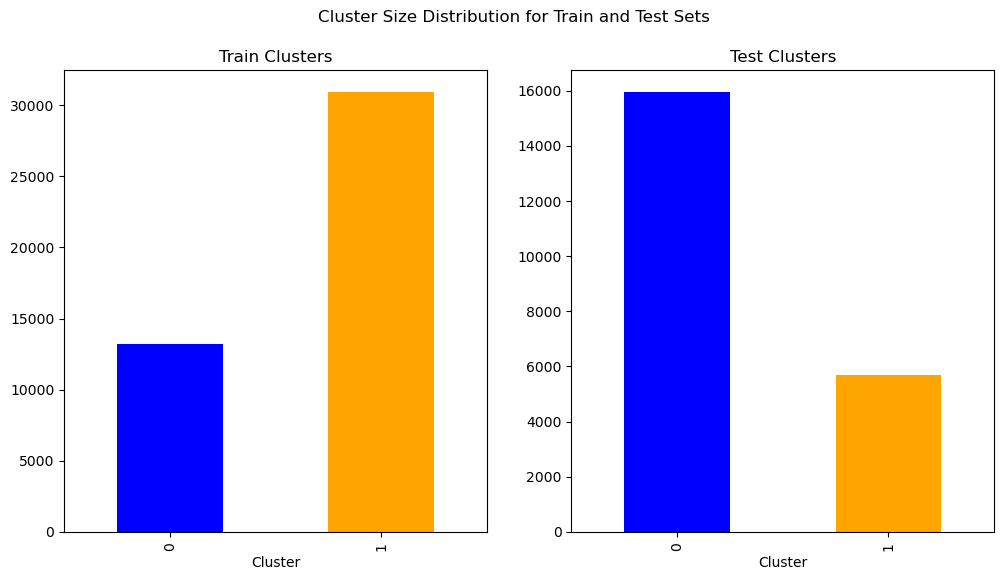

In [422]:
# Plot comparison of cluster sizes
train_counts = churners_train['Cluster'].value_counts().sort_index()
test_counts = churners_test['Cluster'].value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
train_counts.plot(kind='bar', ax=ax[0], color=['blue', 'orange'], title='Train Clusters')
test_counts.plot(kind='bar', ax=ax[1], color=['blue', 'orange'], title='Test Clusters')

plt.suptitle("Cluster Size Distribution for Train and Test Sets")
plt.show()

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [339]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [340]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [343]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [345]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [347]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!